In [44]:
import pycbc.catalog

c = pycbc.catalog.Catalog()
c.names

[u'GW151012',
 u'GW170608',
 u'GW170729',
 u'GW150914',
 u'GW151226',
 u'GW170814',
 u'GW170817',
 u'GW170104',
 u'GW170809',
 u'GW170818',
 u'GW170823']

In [1]:
import pycbc.catalog

m = pycbc.catalog.Merger('GW150914')
m.data

{u'E_rad': {u'best': 3.1, u'err': [-0.4, 0.4]},
 u'L_peak': {u'best': 3.6, u'err': [-0.4, 0.4]},
 u'a_final': {u'best': 0.69, u'err': [-0.04, 0.05]},
 u'chi_eff': {u'best': -0.01, u'err': [-0.13, 0.12]},
 u'distance': {u'best': 430.0, u'err': [-170.0, 150.0]},
 u'far_cwb': {u'best': 0.000163, u'err': u'upperbound'},
 u'far_gstlal': {u'best': 1e-07, u'err': u'upperbound'},
 u'far_pycbc': {u'best': 1.5300000000000003e-05, u'err': u'upperbound'},
 u'files': {u'Catalog': u'Release1',
  u'DOI': u'https://doi.org/10.7935/82H3-HH23',
  u'DataRevisionNum': u'R1',
  u'FrameChannels': [u'H1:DCS-CALIB_STRAIN_C02', u'L1:DCS-CALIB_STRAIN_C02'],
  u'FrameTypes': [u'H1_HOFT_C02', u'L1_HOFT_C02'],
  u'GraceDB_ID': u'G184098',
  u'H1': {u'32sec': {u'16KHz': {u'GWF': u'https://www.gw-openscience.org/catalog/GWTC-1-confident/data/GW150914/H-H1_GWOSC_16KHZ_R1-1126259447-32.gwf',
     u'HDF': u'https://www.gw-openscience.org/catalog/GWTC-1-confident/data/GW150914/H-H1_GWOSC_16KHZ_R1-1126259447-32.hdf5',
  

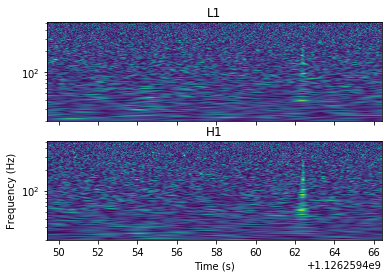

In [61]:
m = pycbc.catalog.Merger("GW150914")

fig, axs = pylab.subplots(2, 1, sharex=True, sharey=True)
for ifo, ax in zip(["L1", "H1"], axs):
    pylab.sca(ax)
    pylab.title(ifo)
    # Retreive data around the BNS merger
    ts = m.strain(ifo).time_slice(m.time - 15, m.time + 6)

    # Whiten the data with a 4s filter
    white = ts.whiten(4, 4)

    times, freqs, power = white.qtransform(.01, logfsteps=200,
                                        qrange=(110, 110),
                                        frange=(20, 512))
    pylab.pcolormesh(times, freqs, power**0.5, vmax=5)

pylab.yscale('log')
pylab.ylabel("Frequency (Hz)")
pylab.xlabel("Time (s)")
pylab.show()

In [2]:
# GW170817 data
d_best = 430.0
d_lower = 260.0
d_upper = 580.0
z = 0.09 #red shift
c = 3.0*10**5 #Speed of light, unit: km/s

v = c*(z**2+2*z)/(z**2+2*z+2)

#Hubble constant, unit: km/s/Mpc， take one decimal place
h_best = round(v/d_best,1)
h_lower = round(v/d_lower,1)
h_upper = round(v/d_upper,1)
print('Measued value of Hubble constant is between '+str(h_upper) + ' and ' + str(h_lower) + 
      ', and the precise value is believed to be ' + str(h_best))

Measued value of Hubble constant is between 44.5 and 99.2, and the precise value is believed to be 60.0
